In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 

In [42]:
data=pd.read_csv('/home/dhriti/Documents/ML/titanic.csv')
data.info()

data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
zero           1309 non-null int64
zero.1         1309 non-null int64
zero.2         1309 non-null int64
zero.3         1309 non-null int64
zero.4         1309 non-null int64
zero.5         1309 non-null int64
zero.6         1309 non-null int64
Parch          1309 non-null int64
zero.7         1309 non-null int64
zero.8         1309 non-null int64
zero.9         1309 non-null int64
zero.10        1309 non-null int64
zero.11        1309 non-null int64
zero.12        1309 non-null int64
zero.13        1309 non-null int64
zero.14        1309 non-null int64
Pclass         1309 non-null int64
zero.15        1309 non-null int64
zero.16        1309 non-null int64
Embarked       1307 non-null float64
zero.17     

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1


In [43]:
data.drop(data.columns[[0]], axis=1, inplace=True)
data.info()
data.isnull().sum()
data["Embarked"].fillna(0.0, inplace = True) 
#data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
Age         1309 non-null float64
Fare        1309 non-null float64
Sex         1309 non-null int64
sibsp       1309 non-null int64
zero        1309 non-null int64
zero.1      1309 non-null int64
zero.2      1309 non-null int64
zero.3      1309 non-null int64
zero.4      1309 non-null int64
zero.5      1309 non-null int64
zero.6      1309 non-null int64
Parch       1309 non-null int64
zero.7      1309 non-null int64
zero.8      1309 non-null int64
zero.9      1309 non-null int64
zero.10     1309 non-null int64
zero.11     1309 non-null int64
zero.12     1309 non-null int64
zero.13     1309 non-null int64
zero.14     1309 non-null int64
Pclass      1309 non-null int64
zero.15     1309 non-null int64
zero.16     1309 non-null int64
Embarked    1307 non-null float64
zero.17     1309 non-null int64
zero.18     1309 non-null int64
2urvived    1309 non-null int64
dtypes: float64(3), int

In [44]:
data.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
zero        0
zero.1      0
zero.2      0
zero.3      0
zero.4      0
zero.5      0
zero.6      0
Parch       0
zero.7      0
zero.8      0
zero.9      0
zero.10     0
zero.11     0
zero.12     0
zero.13     0
zero.14     0
Pclass      0
zero.15     0
zero.16     0
Embarked    0
zero.17     0
zero.18     0
2urvived    0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

In [46]:
features_mean= list(data.columns[:-1])
hist=[]

In [47]:
X = data.loc[:,features_mean]
y = data.loc[:,data.columns[-1]]

scores1=[]
x=[]
for i in range(1,9):
    x.append(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    clf = SVC(C=i)
    clf.fit(X_train, y_train)
    prediction=[]
    prediction = clf.predict(X_test)
    scores1.append(accuracy_score(prediction, y_test))

hist.append(scores1[4])

/home/dhriti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dhriti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dhriti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dhriti/.local/lib/python3.6/site-packages/sklearn/svm/base

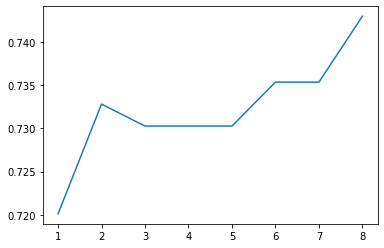

In [48]:
import matplotlib.pyplot as plt

plt.plot(x,scores1)

